In [25]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
from datetime import datetime
import re

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
# State wise % of Fully vaccinated and 1 dose.

In [2]:
df = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv',dtype=str,keep_default_na=False)

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)
df[:5]

,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,Distributed_Per_100k_18Plus,...,Series_Complete_Pfizer_18Plus,Series_Complete_Unk_Manuf_18Plus,Series_Complete_Janssen_65Plus,Series_Complete_Moderna_65Plus,Series_Complete_Pfizer_65Plus,Series_Complete_Unk_Manuf_65Plus,Series_Complete_FedLTC,Series_Complete_FedLTC_Residents,Series_Complete_FedLTC_Staff,Series_Complete_FedLTC_Unknown
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-02,31,RP,"28,650","3,800","20,800","4,050",0,"159,993","187,353","205,421",...,30,0,215,"1,454",9,0,0,0,0,0
2021-08-02,31,SD,"996,865","59,400","443,320","494,145",0,"112,684","135,058","149,330",...,"196,538",18,"3,962","67,607","59,818",11,"5,271","3,115",736,"1,420"
2021-08-02,31,VA,"10,839,065","545,400","4,243,460","6,050,205",0,"126,988","148,339","162,391",...,"2,333,572",865,"63,897","532,408","522,595",498,"88,490","45,714","32,871","9,905"
2021-08-02,31,KS,"3,248,875","173,500","1,409,820","1,665,555",0,"111,518","132,515","146,804",...,"636,975",291,"15,706","186,069","183,913",154,"38,974","20,959","11,135","6,880"
2021-08-02,31,MS,"2,866,005","164,600","1,258,240","1,443,165",0,"96,299","113,666","125,836",...,"495,603",137,"15,383","184,275","153,963",61,"22,390","11,688","5,176","5,526"


In [4]:
df = df[df.index == '2021-07-31']

In [5]:
#Admin_Per_100K	Admin_Per_100k_12Plus	Admin_Per_100k_18Plus	Admin_Per_100k_65Plus
#Administered
#Distributed Dist_Per_100K

In [6]:
df = df[['Location','Distributed','Dist_Per_100K','Administered','Admin_Per_100K','Admin_Per_100k_12Plus','Admin_Per_100k_18Plus','Admin_Per_100k_65Plus']]

In [7]:
# Removing ',' and converting to interger
df2 = df[['Distributed','Dist_Per_100K','Administered','Admin_Per_100K','Admin_Per_100k_12Plus','Admin_Per_100k_18Plus','Admin_Per_100k_65Plus']].replace(',','', regex=True)
df2 = df2[['Distributed','Dist_Per_100K','Administered','Admin_Per_100K','Admin_Per_100k_12Plus','Admin_Per_100k_18Plus','Admin_Per_100k_65Plus']].astype('int')
df2['Location'] = df['Location']
df = df2

In [8]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

def state_us(l):
    for item in us_state_abbrev.values():
        if l == item:
            return 1

In [9]:
df['state'] = df['Location'].map(state_us)
df = df[df['state'] == 1]

In [10]:
# Filtering
df = df[ (df['Distributed'] > 0) & (df['Admin_Per_100K'] != 0) ]

In [11]:
# Plots

In [12]:
#distribution

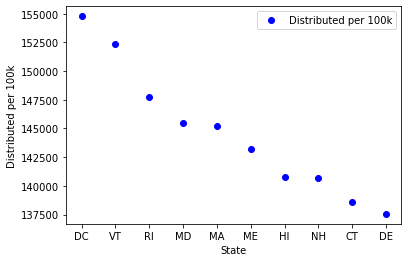

In [13]:
df_top_10_distributed = df.sort_values(by='Dist_Per_100K', ascending = False)[:10]

plot(df_top_10_distributed['Location'], df_top_10_distributed['Dist_Per_100K'], marker='o', linestyle='None', label='Distributed per 100k',color = 'blue')
xlabel('State')
ylabel('Distributed per 100k')
legend(numpoints=1, loc='best')
show()

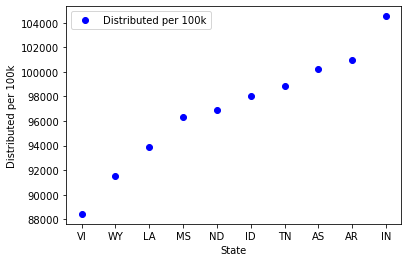

In [14]:
df_bottom_10_distributed = df.sort_values(by='Dist_Per_100K', ascending = True)[:10]

plot(df_bottom_10_distributed['Location'], df_bottom_10_distributed['Dist_Per_100K'], marker='o', linestyle='None', label='Distributed per 100k',color = 'blue')
xlabel('State')
ylabel('Distributed per 100k')
legend(numpoints=1, loc='best')
show()

In [15]:
#Administered

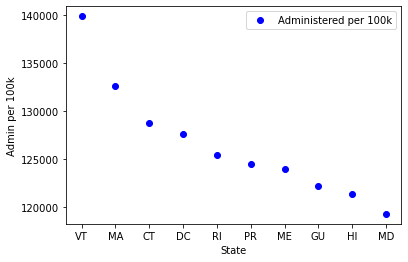

In [16]:
df_top_10_admin = df.sort_values(by='Admin_Per_100K', ascending = False)[:10]

plot(df_top_10_admin['Location'], df_top_10_admin['Admin_Per_100K'], marker='o', linestyle='None', label='Administered per 100k',color = 'blue')
xlabel('State')
ylabel('Admin per 100k')
legend(numpoints=1, loc='best')
show()

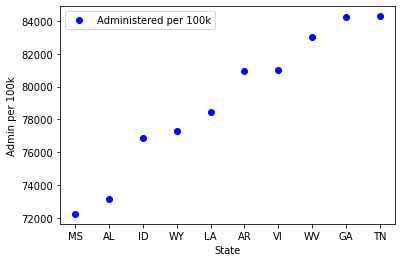

In [17]:
df_bottom_10_admin = df.sort_values(by='Admin_Per_100K', ascending = True)[:10]

plot(df_bottom_10_admin['Location'], df_bottom_10_admin['Admin_Per_100K'], marker='o', linestyle='None', label='Administered per 100k',color = 'blue')
xlabel('State')
ylabel('Admin per 100k')
legend(numpoints=1, loc='best')
show()

In [18]:
# Dist - Admin

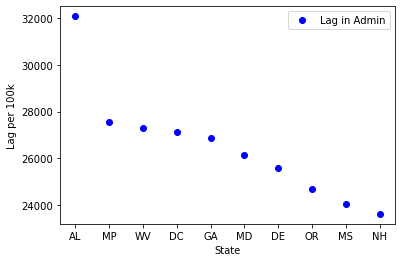

In [19]:
df['Lag'] = df['Dist_Per_100K'] - df['Admin_Per_100K']

df_top_10_lag = df.sort_values(by='Lag', ascending = False)[:10]

plot(df_top_10_lag['Location'], df_top_10_lag['Lag'], marker='o', linestyle='None', label='Lag in Admin',color = 'blue')
xlabel('State')
ylabel('Lag per 100k')
legend(numpoints=1, loc='best')
show()

In [20]:
df['Lag'] 

Date
2021-07-31    15420
2021-07-31    32075
2021-07-31    21511
2021-07-31    -1805
2021-07-31     9115
2021-07-31    18513
2021-07-31    11163
2021-07-31    26130
2021-07-31     9768
2021-07-31    22407
2021-07-31    11726
2021-07-31    27312
2021-07-31    21197
2021-07-31    14584
2021-07-31    23623
2021-07-31    24057
2021-07-31     3957
2021-07-31    23625
2021-07-31    19394
2021-07-31    22879
2021-07-31    25591
2021-07-31     9677
2021-07-31    15159
2021-07-31     7908
2021-07-31    20017
2021-07-31    22258
2021-07-31    15357
2021-07-31    12593
2021-07-31    11373
2021-07-31    18747
2021-07-31    14232
2021-07-31    14267
2021-07-31     7433
2021-07-31    19240
2021-07-31    13580
2021-07-31    26885
2021-07-31    13716
2021-07-31    14392
2021-07-31    27560
2021-07-31    14324
2021-07-31     9802
2021-07-31    20308
2021-07-31    13723
2021-07-31    11460
2021-07-31    11451
2021-07-31    12444
2021-07-31    27114
2021-07-31    19357
2021-07-31     6937
2021-07-31    1

In [21]:
# Amoung Age Group

<AxesSubplot:>

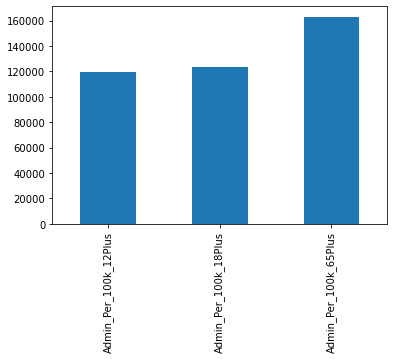

In [22]:
df[['Admin_Per_100k_12Plus','Admin_Per_100k_18Plus','Admin_Per_100k_65Plus']].apply(mean).plot(kind = 'bar')

In [23]:
# For 18 Plus

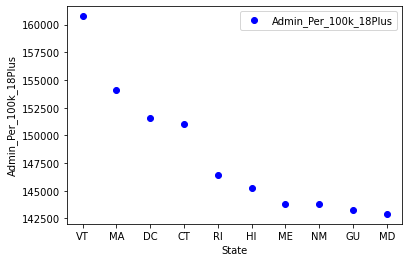

In [24]:
df_top_10_Admin_Per_100k_18Plus = df.sort_values(by='Admin_Per_100k_18Plus', ascending = False)[:10]

plot(df_top_10_Admin_Per_100k_18Plus['Location'], df_top_10_Admin_Per_100k_18Plus['Admin_Per_100k_18Plus'], marker='o', linestyle='None', label='Admin_Per_100k_18Plus',color = 'blue')
xlabel('State')
ylabel('Admin_Per_100k_18Plus')
legend(numpoints=1, loc='best')
show()